In [1]:
# Run with 'solar': conda
from tsai.all import *

Dataset: Sunspots
downloading data...
...data downloaded. Path = data\forecasting\Sunspots.csv


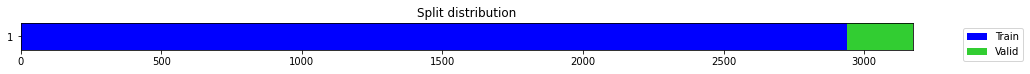

epoch,train_loss,valid_loss,mae,time
0,11788.349609,8791.039062,73.129013,00:14
1,11684.116211,8721.192383,72.743729,00:13


Better model found at epoch 0 with valid_loss value: 8791.0390625.


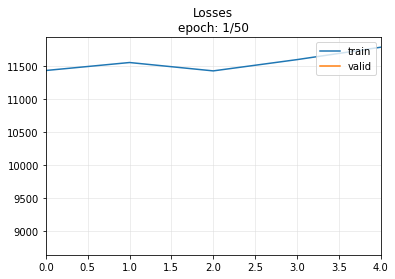

Better model found at epoch 1 with valid_loss value: 8721.1923828125.
No improvement since epoch 0: early stopping


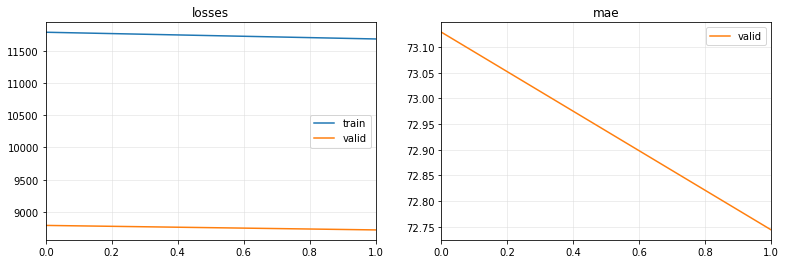

In [2]:
ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(235)(y) 
batch_tfms = TSStandardize()
cbs = [ShowGraph(), SaveModelCallback(monitor='valid_loss', comp=np.less, min_delta=0.01), EarlyStoppingCallback(monitor='valid_loss', comp=np.greater, min_delta=0.01)]
fcst = TSForecaster(X, y, splits=splits, batch_tfms=batch_tfms, bs=512, arch=TST, metrics=mae, cbs=cbs)
fcst.fit_one_cycle(50, 1e-3)